In [292]:
import streamlit as st
import folium
import pandas as pd
import numpy as np
import os

In [293]:
# flag = True
# i = 1

# # https://stackoverflow.com/questions/10377998/how-can-i-iterate-over-files-in-a-given-directory#10378012

# df = pd.read_csv(os.path.join(os.getcwd(), "StormEvents_details-ftp_v1.0_d1950_c20170120.csv"))

# for filename in os.listdir(os.path.join(os.getcwd(), "CSV Files")):
    
#     filepath = os.path.join(os.getcwd(), "CSV Files", filename)
    
#     print("Appending File ", i, ": ", filename)
#     i += 1
        
#     if "details" in filepath:
            
#         df_temp = pd.read_csv(filepath).reset_index(inplace=True)
#         df = df.append(df_temp, ignore_index = True)
        
#     elif "fatalities" in filepath:  
            
#         df_temp = pd.read_csv(filepath)
#         df = df.merge(df_temp, on = ["EVENT_ID"], how = "outer")

#     elif "locations" in filepath:     
            
#         df_temp = pd.read_csv(filepath)
#         df = df.merge(df_temp, on = ["EVENT_ID","EPISODE_ID"], how = "outer")


In [294]:
# df.info()

In [295]:
# df.to_csv("compiled_data.csv")

In [296]:
df = pd.read_csv("https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv")

In [297]:
df.head()

,,,,,,,,,,,,,,,,,,Land-Ocean: Global Means
Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
1880,-.17,-.23,-.08,-.15,-.09,-.20,-.17,-.09,-.14,-.22,-.21,-.16,-.16,***,***,-.11,-.15,-.19
1881,-.19,-.13,.04,.06,.07,-.18,.01,-.02,-.14,-.21,-.17,-.06,-.08,-.08,-.16,.06,-.06,-.17
1882,.17,.15,.05,-.16,-.14,-.22,-.16,-.06,-.14,-.23,-.16,-.36,-.10,-.08,.09,-.08,-.15,-.18
1883,-.28,-.36,-.12,-.18,-.17,-.07,-.07,-.13,-.21,-.11,-.23,-.10,-.17,-.19,-.33,-.16,-.09,-.19


In [298]:
df_weather = pd.read_csv("compiled_data.csv")

In [299]:
df_gas = pd.read_csv("annual-co2-emissions-per-country.csv")

In [300]:
df_gas.head()

,Entity,Code,Year,Annual CO2 emissions
0,Afghanistan,AFG,1949,14656
1,Afghanistan,AFG,1950,84272
2,Afghanistan,AFG,1951,91600
3,Afghanistan,AFG,1952,91600
4,Afghanistan,AFG,1953,106256


In [301]:
df_weather.head()

,Unnamed: 0,BEGIN_AZIMUTH,BEGIN_DATE_TIME,BEGIN_DAY,BEGIN_LAT,BEGIN_LOCATION,BEGIN_LON,BEGIN_RANGE,BEGIN_TIME,BEGIN_YEARMONTH,...,EVENT_YEARMONTH,FATALITY_AGE,FATALITY_DATE,FATALITY_ID,FATALITY_LOCATION,FATALITY_SEX,FATALITY_TYPE,FAT_DAY,FAT_TIME,FAT_YEARMONTH
0,0,NaN,09-APR-69 16:00:00,9.0,36.00,NaN,-93.18,0.0,1600.0,196904.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,06-SEP-69 18:15:00,6.0,36.88,NaN,-88.58,0.0,1815.0,196909.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,16-JUL-69 18:50:00,16.0,41.70,NaN,-98.40,0.0,1850.0,196907.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,29-MAY-69 17:00:00,29.0,42.08,NaN,-76.00,0.0,1700.0,196905.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,28-JUN-69 06:35:00,28.0,38.78,NaN,-94.58,0.0,635.0,196906.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [302]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2926 entries, 0 to 2925
Data columns (total 62 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2926 non-null   int64  
 1   BEGIN_AZIMUTH       0 non-null      float64
 2   BEGIN_DATE_TIME     2926 non-null   object 
 3   BEGIN_DAY           2926 non-null   float64
 4   BEGIN_LAT           2926 non-null   float64
 5   BEGIN_LOCATION      0 non-null      float64
 6   BEGIN_LON           2926 non-null   float64
 7   BEGIN_RANGE         2926 non-null   float64
 8   BEGIN_TIME          2926 non-null   float64
 9   BEGIN_YEARMONTH     2926 non-null   float64
 10  CATEGORY            0 non-null      float64
 11  CZ_FIPS             2926 non-null   float64
 12  CZ_NAME             2845 non-null   object 
 13  CZ_TIMEZONE         2926 non-null   object 
 14  CZ_TYPE             2926 non-null   object 
 15  DAMAGE_CROPS        2926 non-null   float64
 16  DAMAGE

In [303]:
df_weather.drop(columns = ["FATALITY_LOCATION", "BEGIN_AZIMUTH", "BEGIN_LOCATION", 
                           "CATEGORY", "EVENT_YEARMONTH", "FATALITY_AGE", "FATALITY_DATE", 
                           "FATALITY_ID", "FATALITY_SEX", "FATALITY_TYPE", "FAT_DAY", 
                           "FAT_TIME", "FAT_YEARMONTH", "END_AZIMUTH", "END_LOCATION", 
                           "EPISODE_ID", "EPISODE_NARRATIVE", "EVENT_NARRATIVE", 
                           "FLOOD_CAUSE", "MAGNITUDE_TYPE", "SOURCE", "TOR_OTHER_CZ_FIPS", 
                           "TOR_OTHER_CZ_NAME", "TOR_OTHER_CZ_STATE", 
                           "TOR_OTHER_WFO", "WFO", "END_LAT", "END_LON", "TOR_F_SCALE", 
                           "MONTH_NAME"], inplace = True)

In [304]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2926 entries, 0 to 2925
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2926 non-null   int64  
 1   BEGIN_DATE_TIME    2926 non-null   object 
 2   BEGIN_DAY          2926 non-null   float64
 3   BEGIN_LAT          2926 non-null   float64
 4   BEGIN_LON          2926 non-null   float64
 5   BEGIN_RANGE        2926 non-null   float64
 6   BEGIN_TIME         2926 non-null   float64
 7   BEGIN_YEARMONTH    2926 non-null   float64
 8   CZ_FIPS            2926 non-null   float64
 9   CZ_NAME            2845 non-null   object 
 10  CZ_TIMEZONE        2926 non-null   object 
 11  CZ_TYPE            2926 non-null   object 
 12  DAMAGE_CROPS       2926 non-null   float64
 13  DAMAGE_PROPERTY    2926 non-null   object 
 14  DATA_SOURCE        2926 non-null   object 
 15  DEATHS_DIRECT      2926 non-null   float64
 16  DEATHS_INDIRECT    2926 

In [305]:
df_weather.head()

,Unnamed: 0,BEGIN_DATE_TIME,BEGIN_DAY,BEGIN_LAT,BEGIN_LON,BEGIN_RANGE,BEGIN_TIME,BEGIN_YEARMONTH,CZ_FIPS,CZ_NAME,...,EVENT_ID,EVENT_TYPE,INJURIES_DIRECT,INJURIES_INDIRECT,MAGNITUDE,STATE,STATE_FIPS,TOR_LENGTH,TOR_WIDTH,YEAR
0,0,09-APR-69 16:00:00,9.0,36.00,-93.18,0.0,1600.0,196904.0,101.0,NEWTON,...,9984356.0,Hail,0.0,0.0,1.00,ARKANSAS,5.0,0.0,0.0,1969.0
1,1,06-SEP-69 18:15:00,6.0,36.88,-88.58,0.0,1815.0,196909.0,83.0,GRAVES,...,10037132.0,Thunderstorm Wind,0.0,0.0,0.00,KENTUCKY,21.0,0.0,0.0,1969.0
2,2,16-JUL-69 18:50:00,16.0,41.70,-98.40,0.0,1850.0,196907.0,77.0,GREELEY,...,10067849.0,Thunderstorm Wind,0.0,0.0,0.00,NEBRASKA,31.0,0.0,0.0,1969.0
3,3,29-MAY-69 17:00:00,29.0,42.08,-76.00,0.0,1700.0,196905.0,7.0,BROOME,...,10076065.0,Hail,0.0,0.0,1.75,NEW YORK,36.0,0.0,0.0,1969.0
4,4,28-JUN-69 06:35:00,28.0,38.78,-94.58,0.0,635.0,196906.0,37.0,CASS,...,10057764.0,Hail,0.0,0.0,1.75,MISSOURI,29.0,0.0,0.0,1969.0


<AxesSubplot:ylabel='Frequency'>

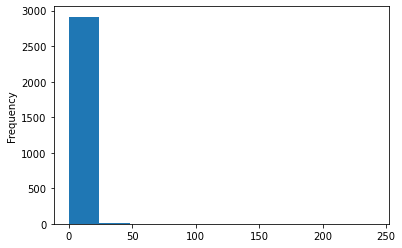

In [306]:
df_weather["INJURIES_DIRECT"].plot.hist()

In [307]:

df_weather.rename(columns = {"BEGIN_LAT": "latitude", "BEGIN_LON": "longitude"}, inplace = True)

In [308]:
df_weather.head()

,Unnamed: 0,BEGIN_DATE_TIME,BEGIN_DAY,latitude,longitude,BEGIN_RANGE,BEGIN_TIME,BEGIN_YEARMONTH,CZ_FIPS,CZ_NAME,...,EVENT_ID,EVENT_TYPE,INJURIES_DIRECT,INJURIES_INDIRECT,MAGNITUDE,STATE,STATE_FIPS,TOR_LENGTH,TOR_WIDTH,YEAR
0,0,09-APR-69 16:00:00,9.0,36.00,-93.18,0.0,1600.0,196904.0,101.0,NEWTON,...,9984356.0,Hail,0.0,0.0,1.00,ARKANSAS,5.0,0.0,0.0,1969.0
1,1,06-SEP-69 18:15:00,6.0,36.88,-88.58,0.0,1815.0,196909.0,83.0,GRAVES,...,10037132.0,Thunderstorm Wind,0.0,0.0,0.00,KENTUCKY,21.0,0.0,0.0,1969.0
2,2,16-JUL-69 18:50:00,16.0,41.70,-98.40,0.0,1850.0,196907.0,77.0,GREELEY,...,10067849.0,Thunderstorm Wind,0.0,0.0,0.00,NEBRASKA,31.0,0.0,0.0,1969.0
3,3,29-MAY-69 17:00:00,29.0,42.08,-76.00,0.0,1700.0,196905.0,7.0,BROOME,...,10076065.0,Hail,0.0,0.0,1.75,NEW YORK,36.0,0.0,0.0,1969.0
4,4,28-JUN-69 06:35:00,28.0,38.78,-94.58,0.0,635.0,196906.0,37.0,CASS,...,10057764.0,Hail,0.0,0.0,1.75,MISSOURI,29.0,0.0,0.0,1969.0


In [309]:
df_weather["BEGIN_DATE_TIME"] = pd.to_datetime(df_weather["BEGIN_DATE_TIME"], 
                                               format = "%d-%b")

ValueError: unconverted data remains: -69 16:00:00

In [310]:
df_weather["MONTH"] = pd.DatetimeIndex(df_weather["BEGIN_DATE_TIME"]).month
df_weather["DAY"] = pd.DatetimeIndex(df_weather["BEGIN_DATE_TIME"]).day
df_weather["YEAR"] = pd.DatetimeIndex(pd.to_datetime(df_weather["YEAR"], format = "%Y")).year

In [311]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2926 entries, 0 to 2925
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2926 non-null   int64  
 1   BEGIN_DATE_TIME    2926 non-null   object 
 2   BEGIN_DAY          2926 non-null   float64
 3   latitude           2926 non-null   float64
 4   longitude          2926 non-null   float64
 5   BEGIN_RANGE        2926 non-null   float64
 6   BEGIN_TIME         2926 non-null   float64
 7   BEGIN_YEARMONTH    2926 non-null   float64
 8   CZ_FIPS            2926 non-null   float64
 9   CZ_NAME            2845 non-null   object 
 10  CZ_TIMEZONE        2926 non-null   object 
 11  CZ_TYPE            2926 non-null   object 
 12  DAMAGE_CROPS       2926 non-null   float64
 13  DAMAGE_PROPERTY    2926 non-null   object 
 14  DATA_SOURCE        2926 non-null   object 
 15  DEATHS_DIRECT      2926 non-null   float64
 16  DEATHS_INDIRECT    2926 

In [312]:
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23403 entries, 0 to 23402
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Entity                23403 non-null  object
 1   Code                  20766 non-null  object
 2   Year                  23403 non-null  int64 
 3   Annual CO2 emissions  23403 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 731.5+ KB


In [313]:
st.write(df_weather)

In [314]:
#st.map(df_weather)

In [315]:
#create a map
this_map = folium.Map(prefer_canvas=True)

def plotDot(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[point.latitude, point.longitude],
                        radius=1,
                        weight=1).add_to(this_map)

#use df.apply(,axis=1) to "iterate" through every row in your dataframe
df_weather.apply(plotDot, axis = 1)


#Set the zoom to the maximum possible
this_map.fit_bounds(this_map.get_bounds())

this_map

In [316]:
df_global_gas = df_gas.groupby("Year").sum("Annual CO2 emissions")

<AxesSubplot:xlabel='Year', ylabel='Annual CO2 emissions'>

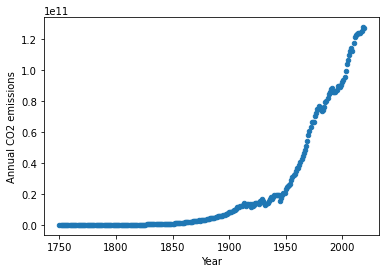

In [317]:
df_global_gas["Year"] = df_global_gas.index

df_global_gas.plot.scatter(x="Year", y="Annual CO2 emissions")

In [318]:
df_global_gas.index

Int64Index([1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759,
            ...
            2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
           dtype='int64', name='Year', length=270)

In [319]:
df_weather_by_year = df_weather.groupby("YEAR")["YEAR"].count()

In [320]:
df_weather_by_year.head()

YEAR
1969    2926
Name: YEAR, dtype: int64

In [321]:
df_weather

,Unnamed: 0,BEGIN_DATE_TIME,BEGIN_DAY,latitude,longitude,BEGIN_RANGE,BEGIN_TIME,BEGIN_YEARMONTH,CZ_FIPS,CZ_NAME,...,INJURIES_DIRECT,INJURIES_INDIRECT,MAGNITUDE,STATE,STATE_FIPS,TOR_LENGTH,TOR_WIDTH,YEAR,MONTH,DAY
0,0,09-APR-69 16:00:00,9.0,36.00,-93.18,0.0,1600.0,196904.0,101.0,NEWTON,...,0.0,0.0,1.00,ARKANSAS,5.0,0.0,0.0,1969,4,9
1,1,06-SEP-69 18:15:00,6.0,36.88,-88.58,0.0,1815.0,196909.0,83.0,GRAVES,...,0.0,0.0,0.00,KENTUCKY,21.0,0.0,0.0,1969,9,6
2,2,16-JUL-69 18:50:00,16.0,41.70,-98.40,0.0,1850.0,196907.0,77.0,GREELEY,...,0.0,0.0,0.00,NEBRASKA,31.0,0.0,0.0,1969,7,16
3,3,29-MAY-69 17:00:00,29.0,42.08,-76.00,0.0,1700.0,196905.0,7.0,BROOME,...,0.0,0.0,1.75,NEW YORK,36.0,0.0,0.0,1969,5,29
4,4,28-JUN-69 06:35:00,28.0,38.78,-94.58,0.0,635.0,196906.0,37.0,CASS,...,0.0,0.0,1.75,MISSOURI,29.0,0.0,0.0,1969,6,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,2921,19-APR-69 17:00:00,19.0,32.73,-102.63,0.0,1700.0,196904.0,165.0,GAINES,...,0.0,0.0,0.00,TEXAS,48.0,0.1,33.0,1969,4,19
2922,2922,26-JUN-69 22:05:00,26.0,40.58,-91.68,0.0,2205.0,196906.0,111.0,LEE,...,0.0,0.0,0.00,IOWA,19.0,0.0,0.0,1969,6,26
2923,2923,28-JUN-69 10:30:00,28.0,42.00,-96.00,0.0,1030.0,196906.0,133.0,MONONA,...,0.0,0.0,0.00,IOWA,19.0,0.0,0.0,1969,6,28
2924,2924,08-AUG-69 22:48:00,8.0,41.58,-93.58,0.0,2248.0,196908.0,153.0,POLK,...,0.0,0.0,52.00,IOWA,19.0,0.0,0.0,1969,8,8
